In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import scipy
import urllib.request
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [2]:
train = ImageDataGenerator(rescale = 1./255.)

test = ImageDataGenerator(rescale = 1./255.)

train_dataset = train.flow_from_directory("data/Train",
                                          target_size=(150,150),
                                          batch_size = 10,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("data/Test",
                                      target_size=(150,150),
                                      batch_size =10,
                                      class_mode = 'binary')

Found 146 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


In [3]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Anemia or 1 for NonAnemia 
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [4]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
model.fit(train_dataset,
     epochs = 30,
     validation_data = test_dataset       
)

Epoch 1/30


15/15 [==============================] - 5s 156ms/step - loss: 0.5356 - accuracy: 0.6986 - val_loss: 0.2342 - val_accuracy: 0.9444
Epoch 2/30
15/15 [==============================] - 2s 132ms/step - loss: 0.0824 - accuracy: 0.9658 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/30
15/15 [==============================] - 2s 137ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 8.3331e-06 - val_accuracy: 1.0000
Epoch 4/30
15/15 [==============================] - 2s 130ms/step - loss: 0.0652 - accuracy: 0.9863 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/30
15/15 [==============================] - 2s 129ms/step - loss: 0.1752 - accuracy: 0.9589 - val_loss: 0.0431 - val_accuracy: 0.9444
Epoch 6/30
15/15 [==============================] - 2s 138ms/step - loss: 0.1900 - accuracy: 0.9795 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 7/30
15/15 [==============================] - 2s 131ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 3.0533e-04 - val_accuracy: 1.0

In [6]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    value_predicted = model.predict(X)
    print(value_predicted)
    if value_predicted == 0:
        plt.xlabel("Anemia",fontsize=30)
    else:
        plt.xlabel("NonAnemia",fontsize=30)

1/1 [==============================] - 0s 47ms/step
[[0.]]


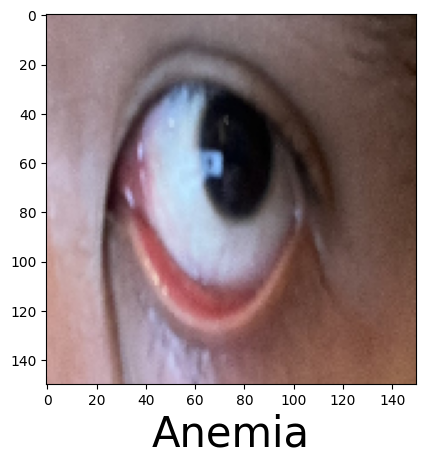

In [12]:
# predictImage(r"")

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
# model.save("model.h5")